In [6]:
%matplotlib inline
import pandas as pd

In [7]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [8]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Bad Money,1999
1,Setan budeg,2009
2,Anna,2015
3,Behind the Mask,1917
4,L'assassino del corriere di Lione,1916


In [9]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


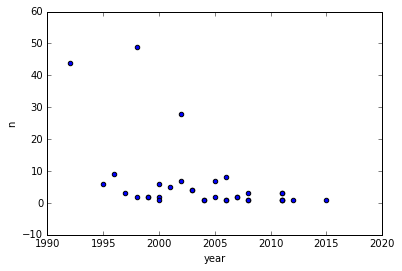

In [10]:
c = cast
dc = c[c.name == 'Daniel Craig']
dc.plot(x = 'year', y = 'n', kind = 'scatter')

### What are the ten most common movie names of all time?

In [11]:
titles.title.value_counts().head(10)


Hamlet                  19
Macbeth                 15
Carmen                  14
Othello                 11
The Outsider            11
The Three Musketeers    11
Maya                    11
Paradise                10
She                     10
Temptation              10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [12]:
t = titles
thez = t[(t.year >=1930) & (t.year < 1940)]
thez.year.value_counts().head(3)

1937    1187
1936    1130
1938    1125
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [13]:
t.head()


,title,year
0,Bad Money,1999
1,Setan budeg,2009
2,Anna,2015
3,Behind the Mask,1917
4,L'assassino del corriere di Lione,1916


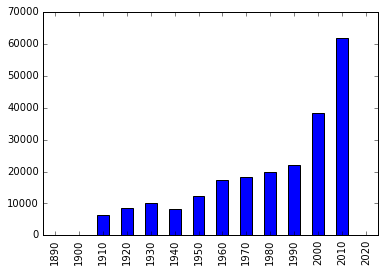

In [14]:
decRel = (t.year//10*10).value_counts().sort_index().plot(kind = 'bar')
decRel


### Plot the number of "Hamlet" films made each decade.

In [15]:
t.head()

,title,year
0,Bad Money,1999
1,Setan budeg,2009
2,Anna,2015
3,Behind the Mask,1917
4,L'assassino del corriere di Lione,1916


In [16]:
hfDec = t[t.title == 'Hamlet']
hfDec.head()

,title,year
173,Hamlet,2000
3185,Hamlet,2011
24209,Hamlet,2009
38817,Hamlet,1948
44356,Hamlet,2015


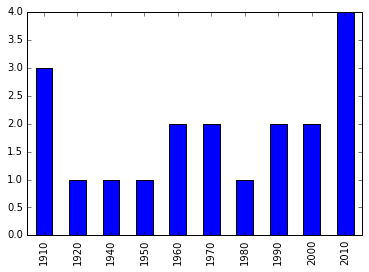

In [17]:
(hfDec.year//10*10).value_counts().sort_index().plot(kind = 'bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

In [18]:
c.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [19]:
charInd = c.set_index(['character']).sort_index()
charInd.head()

,title,year,name,type,n
character,,,,,
'Bones',Holes,2003,Edwin Garcia II,actor,NaN
'The Kid',Hello Herman,2012,David Burrus,actor,37.0
'The Toad',Zig Zag,2002,Oliver Platt,actor,3.0
1. ruumis,Karvat,1974,Seppo Huunonen,actor,19.0
A Ming,Ai you lai sheng,2009,Yihong Duan,actor,2.0


In [20]:
rChar = charInd.loc['Rustler']
rChar.head()

,title,year,name,type,n
character,,,,,
Rustler,The Whirlwind Rider,1934,Herman Hack,actor,NaN
Rustler,Guns of the Pecos,1937,Glenn Strange,actor,NaN
Rustler,Border Romance,1929,Jim Mason,actor,NaN
Rustler,Silent Valley,1935,Jimmy Aubrey,actor,NaN
Rustler,Pinto Canyon,1940,Victor Adamson,actor,NaN


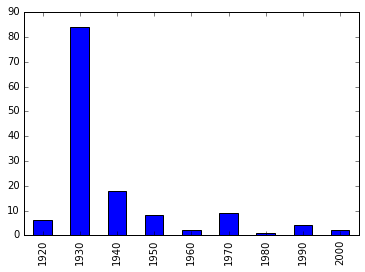

In [21]:
(rChar.year//10*10).value_counts().sort_index().plot(kind = 'bar')

### Plot the number of "Hamlet" characters each decade.

In [22]:
hChar = charInd.loc['Hamlet']
hChar.head()

,title,year,name,type,n
character,,,,,
Hamlet,Amleto,1917,Ruggero Ruggeri,actor,1.0
Hamlet,Come inguaiammo l'esercito,1965,Umberto D'Orsi,actor,4.0
Hamlet,A Midsummer Night's Dream,2016,Samuel (IV) Davis,actor,NaN
Hamlet,Amleto,1910,Dante Cappelli,actor,NaN
Hamlet,Hamlet (II),2016,Emmett Lee Stang,actor,NaN


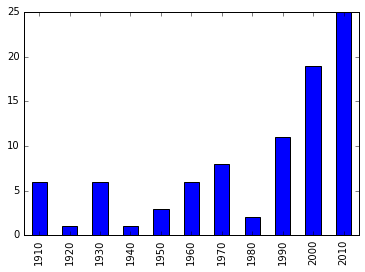

In [23]:
(hChar.year//10*10).value_counts().sort_index().plot(kind = 'bar')

### What are the 11 most common character names in movie history?

In [24]:
c.character.value_counts().head(11)

Himself        18981
Dancer         11578
Extra           9941
Reporter        7877
Doctor          7185
Student         6719
Policeman       6687
Party Guest     6459
Nurse           6394
Bartender       6358
Minor Role      6113
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [25]:
c[c.character == 'Herself'].name.value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Mary Jo Pehl            7
Margaret Thatcher       7
Joan Rivers             6
Bunny Yeager            5
Hillary Clinton         5
Sally Jessy Raphael     5
Caroline Rhea           5
Marilyn Monroe          5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [26]:
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           22
Winston Churchill        21
Benito Mussolini         20
Franklin D. Roosevelt    20
Bill Clinton             20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [27]:
c.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [28]:
c[c.year == 1945].name.value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    30
Harold Miller      29
Bess Flowers       28
Nolan Leary        27
Frank O'Connor     26
Franklyn Farnum    25
Larry Steers       25
Edmund Cobb        24
Tom London         24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [29]:
c[c.year == 1985].name.value_counts().head(10)

Mammootty        21
Shakti Kapoor    19
Sukumari         19
Mohanlal         15
Lou Scheimer     15
Raj Babbar       14
Aruna Irani      14
Deven Verma      13
Rajesh Khanna    13
Jagdish Raj      12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

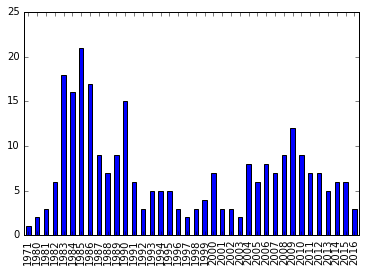

In [30]:
c[c.name == 'Mammootty'].year.value_counts().sort_index().plot(kind = 'bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [31]:
c[c.character.str.startswith('Patron in')].character.value_counts().head(10)


Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in cabaret                3
Patron in restaurant             3
Patron in Restaurant             3
Patron in Club                   3
Patron in booth                  2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [32]:
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         56
Science Student          9
Science Fair Student     9
Science Promo Cadet      5
Science Club Member      5
Science Fair Judge       5
Science Reporter         5
Science Kid              4
Science teacher          3
Science Officer          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

In [33]:
jdnVal = c[c.name == 'Judi Dench'].sort_values('year')
jdnVal.head()

,title,year,name,type,character,n
2604474,The Third Secret,1964,Judi Dench,actress,Miss Humphries,12.0
2604430,A Study in Terror,1965,Judi Dench,actress,Sally,8.0
2604440,He Who Rides a Tiger,1965,Judi Dench,actress,Joanne,2.0
2604437,Four in the Morning,1965,Judi Dench,actress,Wife,2.0
2604428,A Midsummer Night's Dream,1968,Judi Dench,actress,Titania,16.0


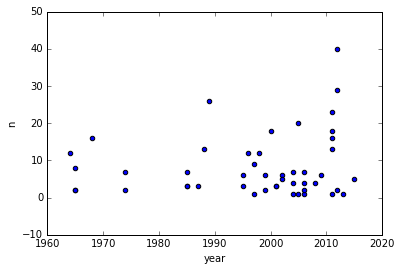

In [34]:
jdnVal.plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-values of Cary Grant's roles through his career.

In [35]:
cgnVal = c[c.name == 'Cary Grant'].sort_values('year')
cgnVal.head()

,title,year,name,type,character,n
810101,Merrily We Go to Hell,1932,Cary Grant,actor,'DeBrion' in play,9.0
810100,Merrily We Go to Hell,1932,Cary Grant,actor,Charlie Baxter,9.0
810073,Blonde Venus,1932,Cary Grant,actor,Nick Townsend,3.0
810099,Madame Butterfly,1932,Cary Grant,actor,Lieutenant B.F. Pinkerton,2.0
810120,Sinners in the Sun,1932,Cary Grant,actor,Ridgeway,8.0


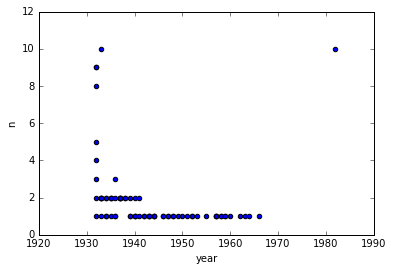

In [36]:
cgnVal.plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

In [37]:
spnVal = c[c.name == 'Sidney Poitier'].sort_values('year')
spnVal.head()

,title,year,name,type,character,n
1688082,Sepia Cinderella,1947,Sidney Poitier,actor,Night Club Extra,NaN
1688077,No Way Out,1950,Sidney Poitier,actor,Dr. Luther Brooks,4.0
1688066,"Cry, the Beloved Country",1951,Sidney Poitier,actor,Reverend Msimangu,3.0
1688081,Red Ball Express,1952,Sidney Poitier,actor,Robertson,5.0
1688070,Go Man Go,1954,Sidney Poitier,actor,Inman Jackson,3.0


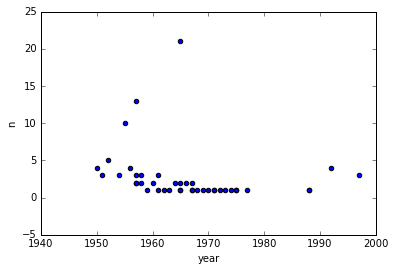

In [38]:
spnVal.plot(x = 'year', y = 'n', kind = 'scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [41]:
c[(c.year//10 == 195) & (c.n == 1)].dropna().type.value_counts()

actor      6494
actress    2881
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [42]:
c[(c.year//10 == 195) & (c.n == 2)].dropna().type.value_counts()

actress    4481
actor      4462
Name: type, dtype: int64